# Chapter 1.3 Representing Qubit States

## Terms to keep in mind

### 1. Statevectors 
- collection of numbers in a vector to represent a specific number 

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [2]:
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state, 0)
qc.draw()

┌─────────────────┐
q: ┤ Initialize(0,1) ├
   └─────────────────┘

In [3]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
result = sim.run(qobj).result()

In [4]:
out_state = result.get_statevector()
print(out_state)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [5]:
qc.measure_all()
qc.draw()

┌─────────────────┐ statevector  ░ ┌─┐
   q: ┤ Initialize(0,1) ├──────░───────░─┤M├
      └─────────────────┘      ░       ░ └╥┘
meas: ════════════════════════════════════╩═

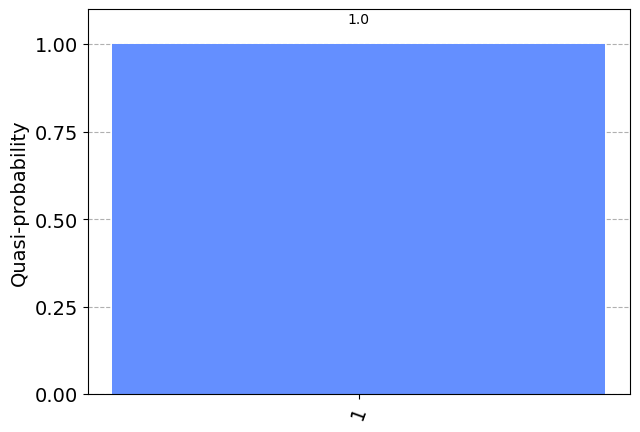

In [6]:
counts = result.get_counts()
plot_histogram(counts)

## Superposition

In [7]:
initial_state = [1/sqrt(2), 1j/sqrt(2)] 
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector

In [8]:
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


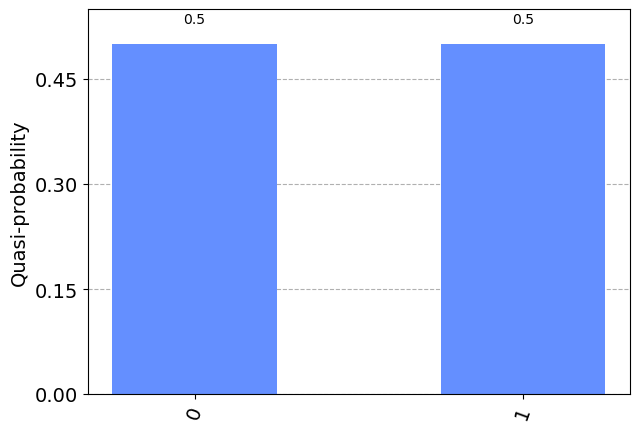

In [9]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

## The Observer Effect

In [10]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw()

┌──────────────────────────────┐
q: ┤ Initialize(0.70711j,0.70711) ├
   └──────────────────────────────┘

In [11]:
qc.save_statevector()
result = sim.run(assemble(qc)).result()
state = result.get_statevector()
print("Qubit State = " + str(state))

Qubit State = Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


In [12]:
qc.measure_all()
qc.draw()

┌──────────────────────────────┐ statevector  ░ ┌─┐
   q: ┤ Initialize(0.70711j,0.70711) ├──────░───────░─┤M├
      └──────────────────────────────┘      ░       ░ └╥┘
meas: ═════════════════════════════════════════════════╩═

## The Bloch Sphere

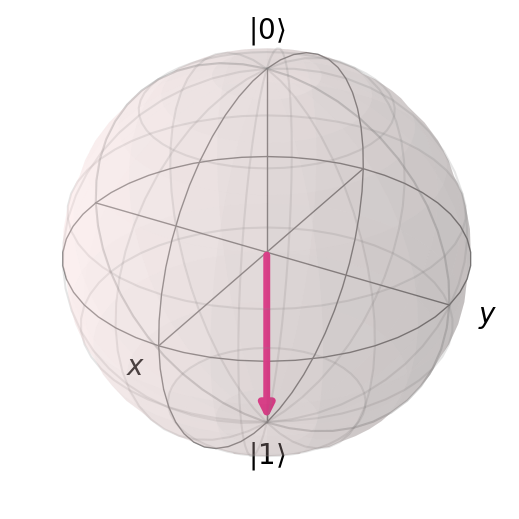

In [13]:
from qiskit.visualization import plot_bloch_vector
coords = [1,pi,0]  # [Radius, Theta, Phi]
plot_bloch_vector(coords, coord_type='spherical')